 Task 2 - Predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.isnull(). sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plot Between Scores Vs Hours


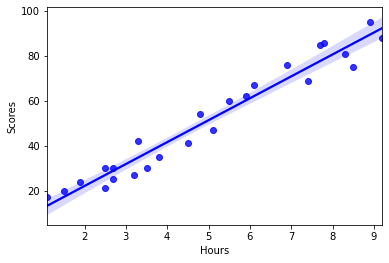

In [7]:
sn.regplot(x=data['Hours'],y=data['Scores'],color='b')

As we can see from above plot that it's a linear regression problem 

In [8]:
X = data.iloc[:, :-1]
y=data.iloc[:, 1]

Splitting The Dataset 

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

mod=LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [11]:
pred=mod.predict(X_valid)
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MA=mean_absolute_error(pred,y_valid)
RM=np.sqrt(mean_squared_error(y_valid,pred))
print('Mean Absolute error in Model :',MA.round(2))
print('Root Mean Squared Error in Model :',RM.round(2))

Mean Absolute error in Model : 4.42
Root Mean Squared Error in Model : 4.79


In [13]:
Tb=pd.DataFrame({'Actual':y_valid})
Tb.reset_index(drop=True,inplace=True)
Tb['Predicted']=pred
Tb['Deviation']=(Tb['Actual']-Tb['Predicted'])
Tb


,Actual,Predicted,Deviation
0,20,17.053665,2.946335
1,27,33.694229,-6.694229
2,69,74.806209,-5.806209
3,30,26.842232,3.157768
4,62,60.123359,1.876641
5,35,39.567369,-4.567369
6,24,20.969092,3.030908
7,86,78.721636,7.278364


Text(0.5, 1.0, 'Deviation v/s Predicted Values( Linear Regression)')

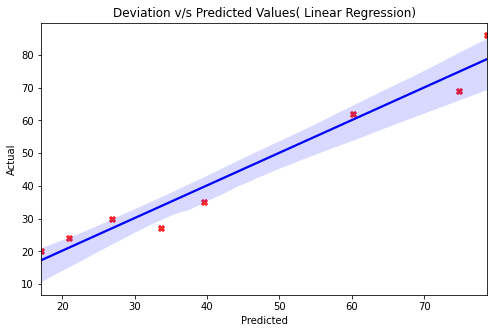

In [15]:
plt.figure(figsize=(8,5))
sn.regplot('Predicted','Actual',data=Tb,line_kws={'color':'blue'},scatter_kws={'color':'red'},marker='X')
plt.title('Deviation v/s Predicted Values( Linear Regression)')

In [16]:
n=float(input())
result=mod.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [92.92]
